# The Sparks Foundation - Data Science & Business Analytics Internship

### Author- ANKIT KUMAR

### TASK 6: PREDICTION USING DECISION TREE ALGORITHM
For the given 'iris' dataset, create the decision tree classifier and visualize it graphically. The purpose is if we feed any new data to this classifier, it will be able to predict the right class accordingly.

#### Steps to be followed:
- Importing the libraries
- Reading the dataset
- Data Preprocessing
- EDA
- Creating the model and evaluation

# Importing the libraries

In [1]:
#importing required libraries                   
import numpy as np  
import pandas as pd
import matplotlib.pyplot as plt             
import seaborn as sns 
print("Imported Successfully")

Imported Successfully


# Reading the dataset

In [2]:
data = pd.read_csv('Iris.csv')
print("Reading done!")

Reading done!


In [3]:
data.head(10)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
5,6,5.4,3.9,1.7,0.4,Iris-setosa
6,7,4.6,3.4,1.4,0.3,Iris-setosa
7,8,5.0,3.4,1.5,0.2,Iris-setosa
8,9,4.4,2.9,1.4,0.2,Iris-setosa
9,10,4.9,3.1,1.5,0.1,Iris-setosa


# Data Preprocessing

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [5]:
data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [6]:
data.Species.value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

In [7]:
data.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [8]:
data.shape

(150, 6)

In [9]:
data.isnull().sum() # Checking if our dataset contains any null or missing values

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

### It has been observed that there are no missing values in the data.

# Exploratory Data Analysis

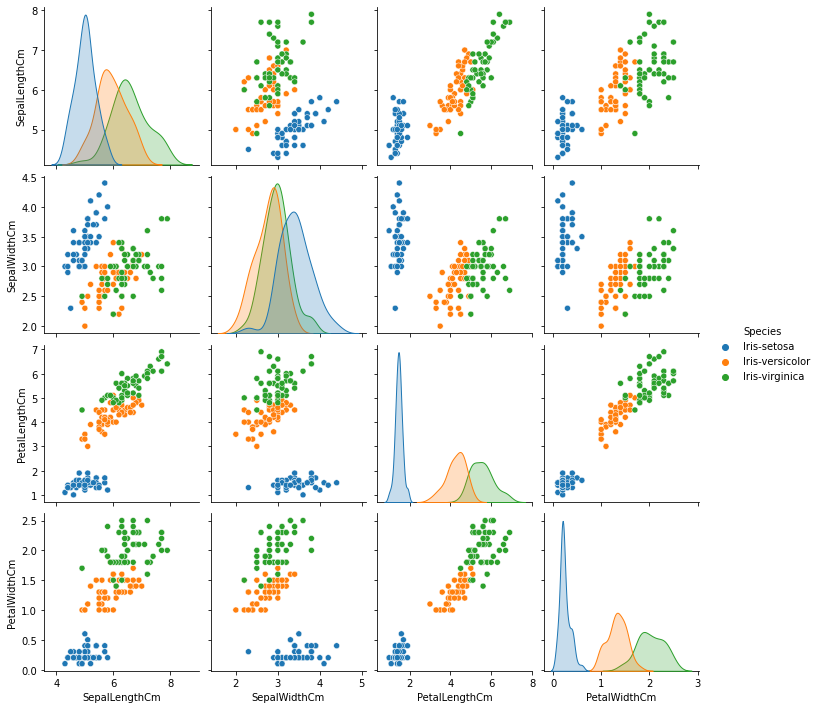

In [10]:
data = data.iloc[:, 1:]
sns.pairplot(data, hue = 'Species')

### It can be seen that one species Iris-setosa has different attributes from the other 2 species Iris-versicolor and Iris-virginica.

# Creating the model

In [11]:
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier # Defining the decision tree algorithm
from sklearn import tree

##### Preparing the data

In [12]:
data = datasets.load_iris()

In [13]:
X = data.data
Y = data.target

In [14]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, train_size = 0.70, random_state = 1) #Taking training size as 70%

##### Fitting the model

In [15]:
DTC = DecisionTreeClassifier(random_state = 1)
model = DTC.fit(x_train, y_train)

In [16]:
text_representation = tree.export_text(DTC)
print(text_representation)

|--- feature_3 <= 0.80
|   |--- class: 0
|--- feature_3 >  0.80
|   |--- feature_3 <= 1.65
|   |   |--- feature_2 <= 5.00
|   |   |   |--- class: 1
|   |   |--- feature_2 >  5.00
|   |   |   |--- feature_0 <= 6.05
|   |   |   |   |--- class: 1
|   |   |   |--- feature_0 >  6.05
|   |   |   |   |--- class: 2
|   |--- feature_3 >  1.65
|   |   |--- feature_2 <= 4.85
|   |   |   |--- feature_1 <= 3.10
|   |   |   |   |--- class: 2
|   |   |   |--- feature_1 >  3.10
|   |   |   |   |--- class: 1
|   |   |--- feature_2 >  4.85
|   |   |   |--- class: 2



In [17]:
prediction = DTC.predict(x_test)

# Model Evaluation

In [18]:
from sklearn.model_selection import cross_val_score
accuracy_scores = cross_val_score(DTC, X, Y, cv = 3)
accuracy_scores

array([0.98, 0.94, 1.  ])

In [19]:
accuracy_scores.mean()

0.9733333333333333

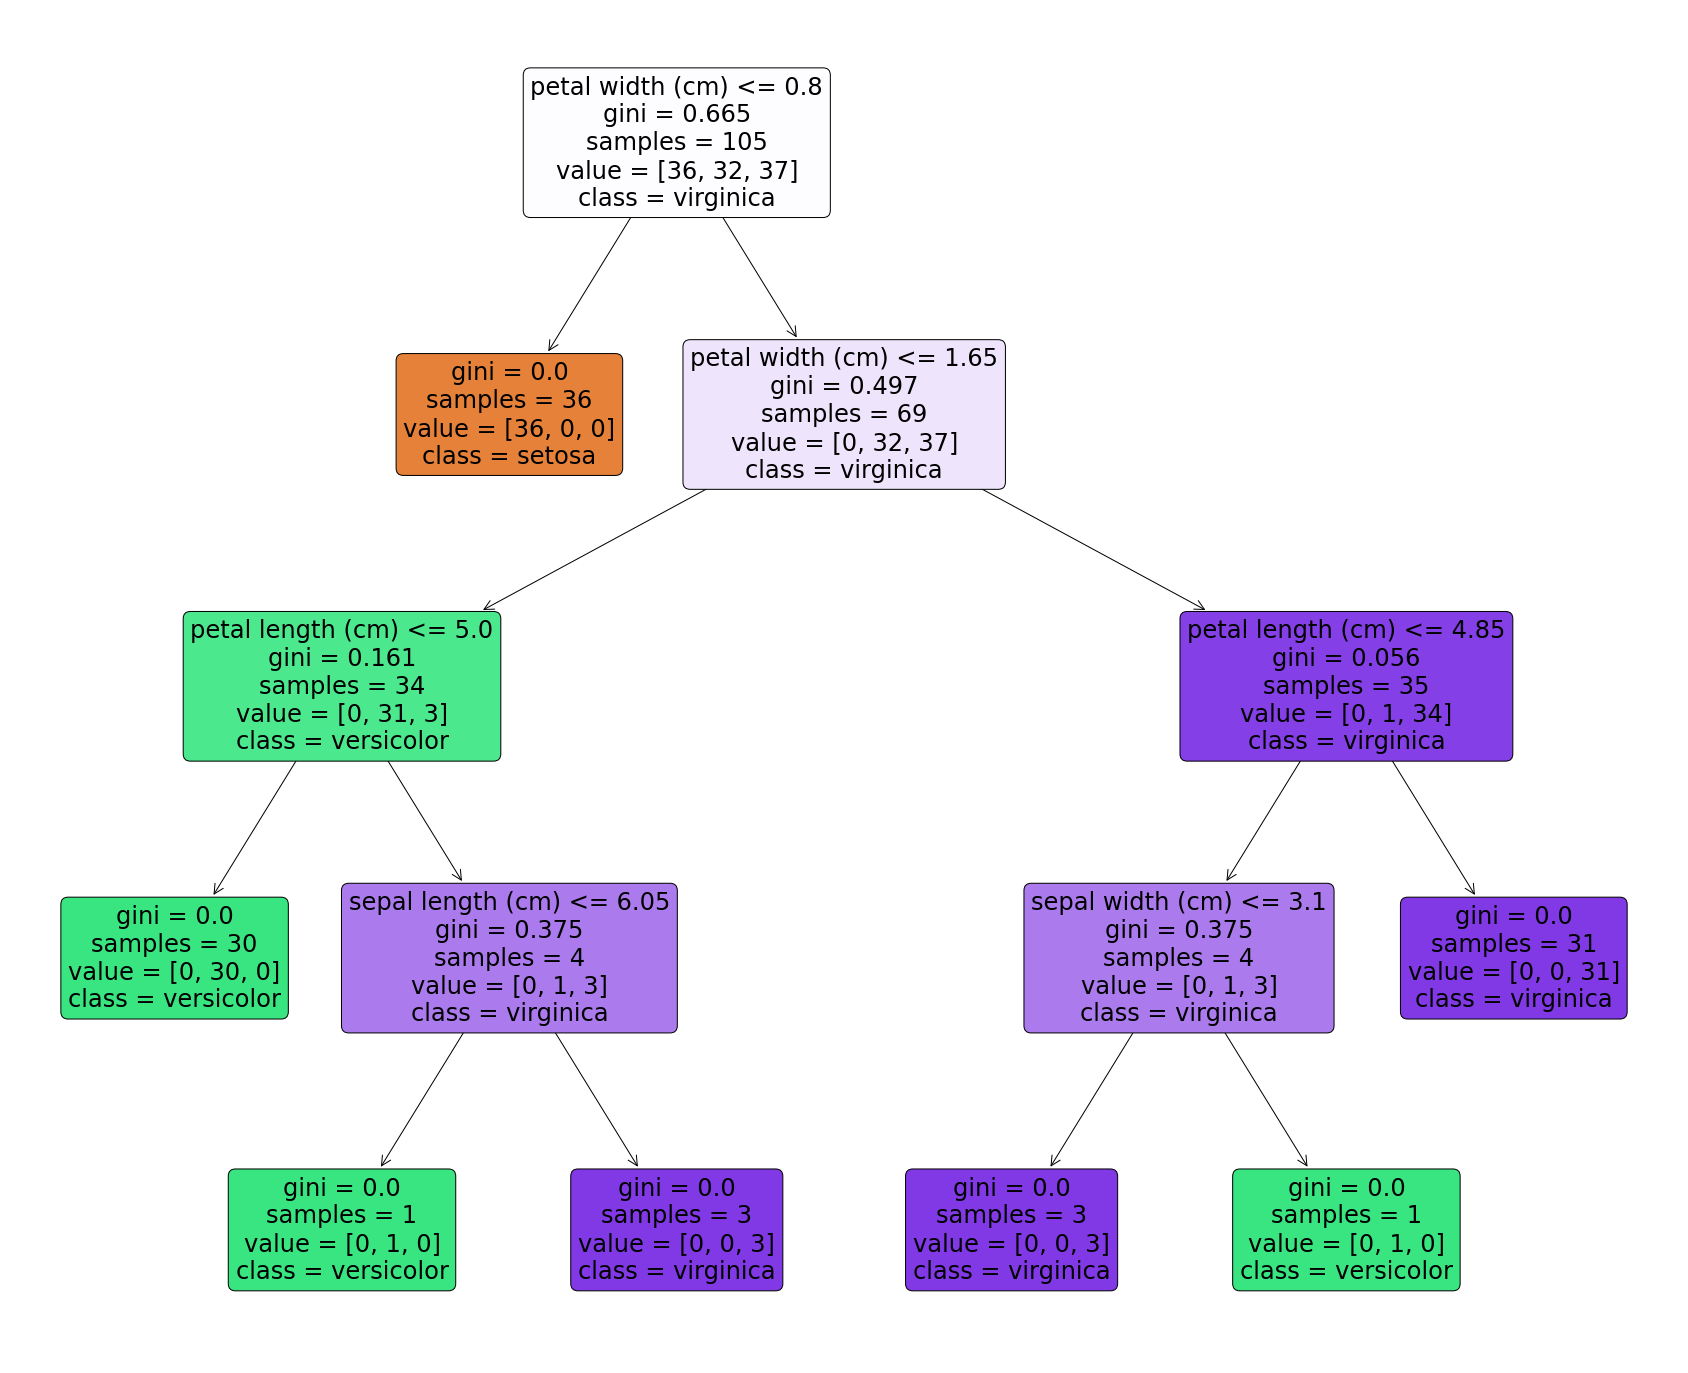

In [20]:
# Plotting the decision tree
fig = plt.figure(figsize = (30, 25))
tree = tree.plot_tree(DTC,feature_names = data.feature_names, class_names = data.target_names,filled = True, rounded = True)

# Conclusion

#### It has been observed that the model can predict the right class accordingly for new or test data with 97.33% accuracy (almost 98%). Out of 45 test observation we can say model have correctly identified 44 and so, that it is a good model for the prediction of the class based on the four parameters according to decision tree above.